<a href="https://colab.research.google.com/github/Amaljayaranga/DavisDataset/blob/master/MemmapCreation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!unzip bear.zip

Archive:  bear.zip
   creating: bear/
 extracting: bear/00000.jpg          
 extracting: bear/00001.jpg          
 extracting: bear/00002.jpg          
 extracting: bear/00003.jpg          
 extracting: bear/00004.jpg          
 extracting: bear/00005.jpg          
 extracting: bear/00006.jpg          
 extracting: bear/00007.jpg          
 extracting: bear/00008.jpg          
 extracting: bear/00009.jpg          
 extracting: bear/00010.jpg          
 extracting: bear/00011.jpg          
 extracting: bear/00012.jpg          
 extracting: bear/00013.jpg          
 extracting: bear/00014.jpg          
 extracting: bear/00015.jpg          
 extracting: bear/00016.jpg          
 extracting: bear/00017.jpg          
 extracting: bear/00018.jpg          
 extracting: bear/00019.jpg          
 extracting: bear/00020.jpg          
 extracting: bear/00021.jpg          
 extracting: bear/00022.jpg          
 extracting: bear/00023.jpg          
 extracting: bear/00024.jpg          
 extracting:

In [0]:

import cv2
import os
import numpy as np
from tempfile import mkdtemp
import os.path as path

folder_path = './bear/'
memmaps = []
dtype = ''
shape = ''

for filename in os.listdir(folder_path):
    memmap_filename = filename.split('.')[0]+'.mmap'
    memmap_filename = path.join(mkdtemp(), memmap_filename)

    im = cv2.imread(folder_path+filename)
    dtype = im.dtype
    shape = im.shape
    # print("original shape",shape) (480, 854, 3)
    fp = np.memmap(memmap_filename, dtype=dtype, mode='w+', shape=shape)
    fp[:] = im[:]
    memmaps.append(fp)


complete_memmap = folder_path+'memmap'

os.makedirs(os.path.dirname(folder_path+'memmap'), exist_ok=True)
complete_shape = (len(memmaps),shape[0], shape[1], shape[2])
#print("Complete shape ",complete_shape) #(82, 480, 854, 3)
#complete_shape=(82,480,854,3)
#print(complete_shape)
fpc = np.memmap(complete_memmap, dtype=dtype, mode='w+', shape=complete_shape)
fpc[:] = memmaps[:]







[[[21 26 29]
  [23 28 31]
  [24 29 32]
  ...
  [83 78 79]
  [85 80 82]
  [72 69 71]]

 [[21 26 29]
  [23 28 31]
  [23 28 31]
  ...
  [81 76 77]
  [74 71 73]
  [71 68 70]]

 [[21 26 29]
  [21 26 29]
  [21 26 29]
  ...
  [95 90 92]
  [82 79 81]
  [83 80 82]]

 ...

 [[43 45 46]
  [42 44 45]
  [40 42 43]
  ...
  [59 65 72]
  [57 63 70]
  [51 57 64]]

 [[20 22 23]
  [23 25 26]
  [27 29 30]
  ...
  [47 53 60]
  [45 51 58]
  [47 53 60]]

 [[11 13 14]
  [13 15 16]
  [15 17 18]
  ...
  [35 41 48]
  [29 35 42]
  [36 42 49]]]
(480, 854, 3)


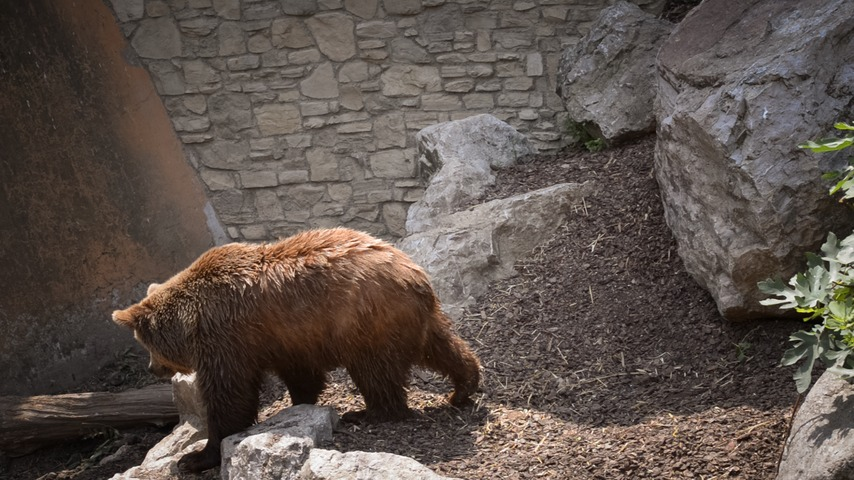

In [7]:
from google.colab.patches import cv2_imshow
folder_path = './bear/'
complete_shape=(82,480,854,3)
complete_memmap = folder_path+'memmap'
newfp = np.memmap(complete_memmap, dtype='uint8', mode='r', shape=complete_shape)
print(newfp[0])
img = newfp[0]
print(img.shape)
cv2_imshow(img)

